<a href="https://colab.research.google.com/github/twyeh/AI-in-education/blob/main/01_%E6%A8%99%E6%BA%96%E7%9A%84_Fully_Connected_(Dense)_NN20250804_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### 1. 讀入 MNSIT 數據集

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### 你也可以讀入 Fasion 版的 MNIST

In [ ]:
# from tensorflow.keras.datasets import fashion_mnist
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容 (非執行必要)

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
n = 9000

In [ ]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  41, 239, 253, 253, 253,
        174,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 175, 251, 251, 251, 251,
        173,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  82, 228, 251, 251, 251, 251,
        173,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  10, 137, 251, 251, 236,  92,  18,
         13,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  59, 251, 251, 251, 153,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  59, 251, 251, 226,  59,   0,   0,
          0,   0,   0,   0,   0, 109, 155,  96,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  59, 251, 251, 212,   0,   0,   0,
          0,   0,  16, 215, 214, 239, 251, 236, 214,  47,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 119, 251, 251, 212,   0,   0,   0,
         25,  78, 212, 253, 251, 251, 251, 251, 251, 237,  54,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 253, 251, 251, 212,   0,   0,   0,
         78, 251, 251, 253, 251, 251, 251, 251, 251, 251, 215,  63,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 253, 251, 251, 212,   0,   0,  16,
        212, 251, 251, 253, 251, 251, 220, 131, 251, 251, 251, 220,  44,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 255, 253, 253, 213,   0,  37, 224,
        253, 253, 253, 150,   0,   0,   0,   0,   0, 215, 253, 253,  57,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 253, 251, 251, 212,   0, 155, 251,
        251, 251, 160,   0,   0,   0,   0,   0,   0, 214, 251, 251,  57,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 253, 251, 251, 239, 175, 222, 251,
        251, 251,  57,   0,   0,   0,   0,   0, 109, 239, 251, 156,  18,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 251, 251, 251, 251, 251, 251,
        239, 107,   4,   0,   0,   0,  37, 115, 244, 251, 239,  98,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  59, 251, 251, 251, 251, 251, 251,
        173,   0,   0,  23,  98,  98, 240, 251, 251, 243, 107,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  59, 251, 251, 251, 251, 251, 251,
        221, 155, 155, 179, 251, 251, 251, 251, 251, 231,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   9,  37, 172, 249, 251, 251, 251,
        251, 251, 251, 253, 251, 237, 231, 156,  37,  35,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 161, 203, 251, 251,
        251, 251, 251, 174, 173,  53,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 199, 251,
        251, 251, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  36,  72,
        190,  57,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
y_train[n]

np.uint8(6)

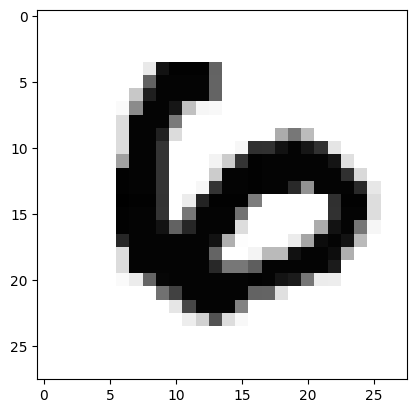

In [ ]:
plt.imshow(x_train[n], cmap='Greys')

### 3. 資料整理

先看個範例, 因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [ ]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 4. step 1: 打造神經網路

In [ ]:
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

#### 組裝我們的神經網路

In [ ]:
model.compile(loss='mse', optimizer='SGD',
              metrics=['accuracy'])

#### 欣賞我們的作品

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

### 5. step 2: 訓練

In [ ]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1529 - loss: 0.0914
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2403 - loss: 0.0882
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3505 - loss: 0.0850
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4425 - loss: 0.0813
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4992 - loss: 0.0769
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5461 - loss: 0.0721
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5785 - loss: 0.0675
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6210 - loss: 0.0628
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6717 - loss: 0.0581
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7084 - loss: 0.0541
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7338 - loss: 0.0504
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

### 6. step 3: 預測 (testing)

In [ ]:
predict = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


神經網路預測是: [0.02931752 0.04083305 0.1838025  0.39404207 0.10017895 0.02177349
 0.03088146 0.00420407 0.17416602 0.02080081]


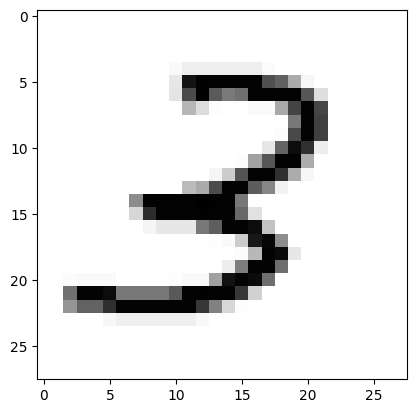

In [ ]:
n = np.random.randint(9999)

print('神經網路預測是:', predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

### 7. 儲存我們的 model

In [ ]:
model.save("my_nn.h5")

In [ ]:
model.save('my_model.keras')

In [ ]:
import tensorflow as tf

In [ ]:
tf.test.gpu_device_name()

''

In [ ]:
如何使用訓練好的模型進行驗證

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('my_model.keras')

# Evaluate the model on the test data
loss, accuracy = loaded_model.evaluate(x_test, y_test)

print(f"Loss on test data: {loss}")
print(f"Accuracy on test data: {accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7796 - loss: 0.0360
Loss on test data: 0.03259215131402016
Accuracy on test data: 0.8033000230789185
